In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
# Reading the dataset
df = pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
stop_words = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Creating the target variable
df['Sentiment'] = np.where(df['Score']>3, 'positive', np.where(df['Score']==3, 'neutral', 'negative'))

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])


y = df['Sentiment']

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = MultinomialNB()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.8357829555549692
Classification report:               precision    recall  f1-score   support

    negative       0.66      0.66      0.66     16181
     neutral       0.35      0.33      0.34      8485
    positive       0.91      0.92      0.91     89025

    accuracy                           0.84    113691
   macro avg       0.64      0.64      0.64    113691
weighted avg       0.83      0.84      0.84    113691

Confusion matrix: [[10708  1619  3854]
 [ 1743  2827  3915]
 [ 3831  3708 81486]]


In [8]:
joblib.dump(clf, 'naive.joblib')

['naive.joblib']

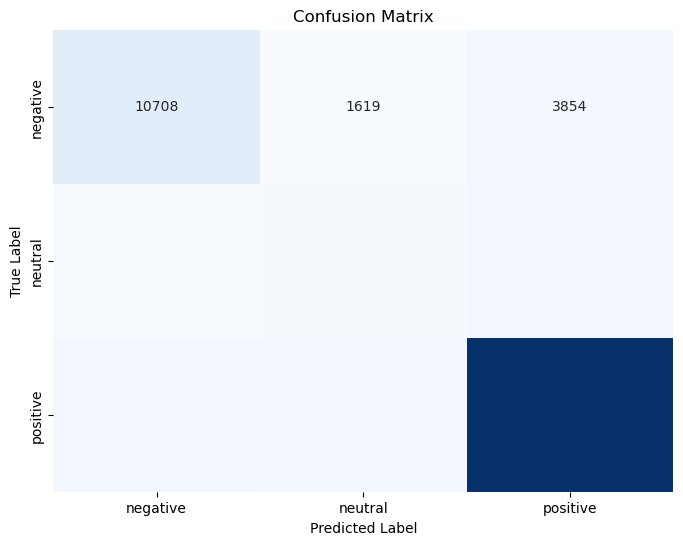

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined and trained your classifier (clf), and split your data into X_train, X_test, y_train, y_test

# Make predictions
y_pred = clf.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
